# Sales Analysis

## Task1: Merging 12 Months of Sales Data into One single CSV File

In [1]:
import pandas as pd
import os

### Concatenate Multiple CSV Files into a Single DataFrame

In this code snippet, we perform the following tasks:

1. Read a sample CSV file, "Sales_April_2019.csv," located at the specified path.
2. List all CSV files in the directory "C:\Users\mavur\OneDrive\Desktop\jupyter workspace\Sales_Data."
3. Initialize an empty DataFrame called "all_months_data" to store the concatenated data.
4. Loop through each CSV file in the directory, read its contents using pandas, and concatenate it to the "all_months_data" DataFrame.
5. Specify the output file path as "C:\Users\mavur\OneDrive\Desktop\jupyter workspace\Sales_Data\all_data.csv."
6. Save the concatenated DataFrame to a new CSV file named "all_data.csv" without including the index column.

This code helps combine data from multiple CSV files into a single CSV file for further analysis or processing.

In [2]:
df= pd.read_csv(r"C:\Users\mavur\OneDrive\Desktop\jupyter workspace\Sales_Data\Sales_April_2019.csv")

files=[file for file in os.listdir(r"C:\Users\mavur\OneDrive\Desktop\jupyter workspace\Sales_Data")]

all_months_data=pd.DataFrame()

for file in files:
    df = pd.read_csv("C:\\Users\\mavur\\OneDrive\\Desktop\\jupyter workspace\\Sales_Data\\" + file)

    all_months_data=pd.concat([all_months_data,df])
    
# Specify the output file path and name correctly
output_file_path = r"C:\Users\mavur\OneDrive\Desktop\jupyter workspace\Sales_Data\all_data.csv"

# Save the concatenated DataFrame to a CSV file
all_months_data.to_csv(output_file_path, index=False)

In [3]:
all_data=pd.read_csv(r"C:\Users\mavur\OneDrive\Desktop\jupyter workspace\Sales_Data\all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### CleanUp the Data

In [4]:
all_data=all_data.dropna()

In [5]:
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]

### Augument the data with  additional columns

 ## Task 2: Adding Month Column

To enhance our dataset for time series analysis, we're adding a 'Month' column derived from the 'Order Date' column. This allows us to aggregate and analyze sales data on a monthly basis.

Here's the step-by-step process:

 **Extracting the Month**: We extract the month from the 'Order Date' column, which appears to be in the format 'MM/DD/YY HH:MM'. The month is the first part of this string.




In [6]:
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype("Int32")

all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Convert the Columns to Correct dataTypes

In [7]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
373696,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
373697,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


## Task3: Adding a Sales Column

To analyze the total sales data, we need to calculate the sales for each order. We can achieve this by creating a new column called 'Sales', which is the product of the 'Quantity Ordered' and 'Price Each' columns.

The following code snippet demonstrates this calculation:




In [8]:
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
373696,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
373697,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Task 4: Add a City Column

In [9]:

# Function to get the city from the address
def get_city(address):
    return address.split(',')[1]

# Function to get the state from the address
def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Apply the functions to the 'Purchase Address' column to create a new 'City' column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Display the head of the DataFrame to verify the results
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [10]:
results=all_data.groupby('Month').sum()



C:\Users\mavur\AppData\Local\Temp\ipykernel_15244\504935776.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby('Month').sum()


### Generating a Bar Chart of Total Sales per Month

In this code, we create a bar chart to visualize the total sales per month. Here's what each part of the code does:

- **Importing Matplotlib:** We import the Matplotlib library and its ticker module for formatting tick labels.

- **Data Preparation:** We assume you have a list of month numbers stored in the `months` variable and your sales data in the `results['Sales']` variable. Make sure to replace it with your actual data.

- **Creating the Bar Chart:** We use `plt.bar()` to create the bar chart. We set the title, labels for the x and y-axes, and adjust the layout for better visualization using `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, and `plt.tight_layout()`.

- **Formatting the Y-Axis Labels:** We define a custom formatter function called `millions_formatter(x, pos)` that formats the y-axis labels to display numbers with commas as thousands separators.

- **Setting the Y-Axis Formatter:** We set the major formatter for the y-axis to use our custom `millions_formatter` function, ensuring that large sales values are displayed more clearly.

- **Setting the Tick Positions:** We set the x-axis tick positions to correspond to the months using `plt.xticks(months)`.

- **Displaying the Plot:** Finally, we use `plt.show()` to display the bar chart.

This code helps you create a clear and informative visualization of total sales per month, making it easier to analyze and understand the data.


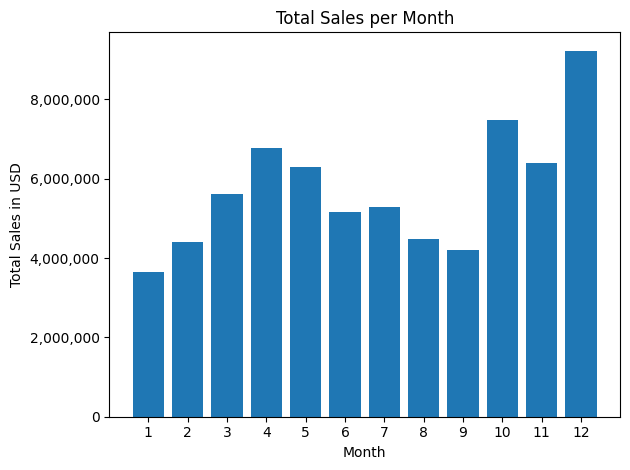

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# `months` is a list of month numbers and `results['Sales']` contains the sales data
months = range(1, 13)
sales = results['Sales']  # Replace with your actual sales data

plt.bar(months, sales)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales in USD')

# Create a function that formats the tick labels
def millions_formatter(x, pos):
    return f'{int(x):,}'

# Set the y-axis major formatter using the above function
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.xticks(months)
plt.tight_layout()
plt.show()



### City With Highest No.of Sales

In [12]:
results=all_data.groupby("City").sum()
results

C:\Users\mavur\AppData\Local\Temp\ipykernel_15244\1096296902.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16
Austin (TX),22306,3619747.22,139658,3639163.50
Boston (MA),45056,7274819.54,282224,7323284.02
Dallas (TX),33460,5505255.64,209240,5535950.80
Los Angeles (CA),66578,10842870.46,416650,10905141.60
New York City (NY),55864,9270741.66,351482,9328634.86
Portland (ME),5500,894378.50,34288,899516.54
Portland (OR),22606,3721116.44,141242,3741464.68
San Francisco (CA),100478,16422923.48,631040,16524407.82


Text(0, 0.5, 'Total Sales in USD')

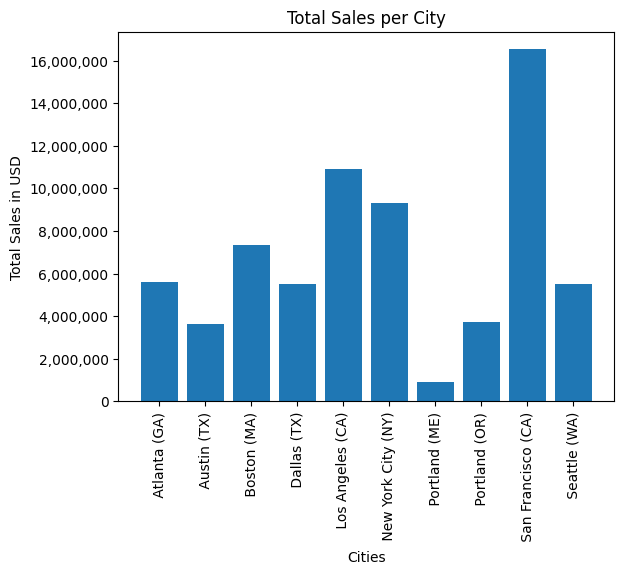

In [13]:
import matplotlib.pyplot as plt

# Create a function that formats the tick labels
def millions_formatter(x, pos):
    return f'{int(x):,}'

# Set the y-axis major formatter using the above function
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))


cities= [city for city ,df in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.title('Total Sales per City')
plt.xlabel('Cities')
plt.xticks(cities, rotation='vertical')
plt.ylabel('Total Sales in USD')

## Analysis of Total Sales per City for a Consumer Electronics Company

The provided bar chart illustrates the total sales distribution across various cities where the consumer electronics company operates. Here are some insights drawn from the visualization:

- **Sales Distribution**: There is a clear disparity in sales across the cities. This could be indicative of market saturation, local preferences, or the effectiveness of regional marketing campaigns.

- **Top Performing City**: San Francisco, CA, emerges as the city with the highest sales. The city's robust tech industry and affluent population could be key contributors to this trend.

- **Significant Markets**: Los Angeles, CA, and New York City, NY, also demonstrate high sales volumes. Their large populations and status as cultural hubs may influence these figures.

- **Growth Potential**: Cities like Boston, MA, and Austin, TX, show lower sales in comparison, suggesting potential areas for business growth or the need for targeted marketing strategies.

- **Strategic Planning**: The company can use this data for strategic planning, such as prioritizing regions for expansion, allocating resources, and customizing sales approaches to regional demand.

- **Comprehensive Market Analysis**: Integrating this data with additional metrics—such as store count, competitive analysis, and demographic information—can provide a more nuanced understanding of each market's dynamics.

- **Trend Observation**: Analyzing how these sales figures change over time would also be beneficial. It can reveal trends, seasonal impacts, and the effects of promotions or local events on consumer behavior.

This chart serves as a valuable tool for the company's strategic decisions, allowing it to identify strong markets, uncover areas for growth, and allocate resources more effectively.


In [14]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
373696,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
373697,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### What Time Should We Display Advertisements to maximize the likelihood of customer buying the products??

In [15]:
# Convert 'Order Date' to datetime

all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
373696,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
373697,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [19]:
# Extract hour from 'Order Date' and create an 'Hour' column

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
373696,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
373697,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


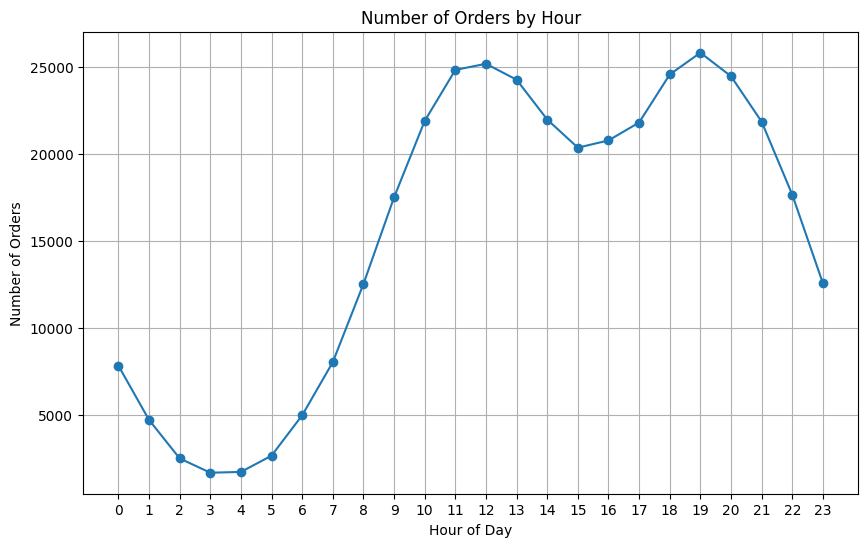

In [27]:

# Group by 'Hour' and count the number of orders
hourly_orders = all_data.groupby('Hour').count()

# Plotting the number of orders by hour using a line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_orders.index, hourly_orders['Order ID'], marker='o', linestyle='-')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


## Peak Hours for Consumer Electronics Orders

The line plot above represents the number of orders placed at various hours throughout the day for the consumer electronics company. The following insights can be drawn from the visualization:

- **Morning and Late Evening Peaks**: There are two distinct peaks in the number of orders – one in the late morning around 11 am and another in the late evening around 7 pm. This suggests that customers are most active in purchasing electronics shortly before noon and in the evening after work hours.

- **Troughs in Early Hours**: As expected, the early hours of the day, from midnight to 6 am, show the fewest orders, which corresponds to the time most people are asleep or just starting their day.

- **Steady Afternoon Activity**: The period from around 12 pm to 6 pm shows consistent order activity, which may be attributed to customers shopping during lunch hours or in the afternoon.

- **Implications for Ad Scheduling**: Based on these trends, the company might consider scheduling targeted advertisements shortly before the peak times, such as late morning and early evening. This could increase visibility and potentially drive higher order volumes.

- **Additional Considerations**: It would also be useful to analyze the average order value by hour to see if these peaks correspond not only to a higher quantity of orders but also to higher sales overall.

By leveraging these insights, the company can make data-driven decisions to optimize advertisement timing and promotional strategies, ultimately aiming to increase sales and customer engagement.


In [30]:
# Group by the 'Hour' column and calculate the average of the 'Sales' column
average_sales_by_hour = all_data.groupby('Hour')['Sales'].mean()


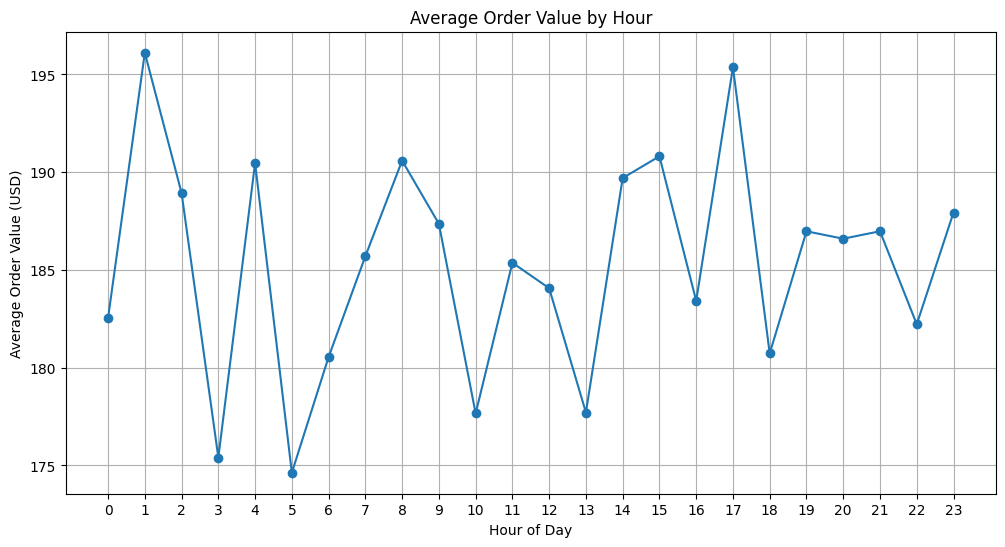

In [32]:
plt.figure(figsize=(12, 6))
average_sales_by_hour.plot(kind='line', marker='o')
plt.title('Average Order Value by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Order Value (USD)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


## Analysis of Average Order Value by Hour

The line plot above depicts the average order value by hour for a consumer electronics company. The x-axis indicates the hour of the day, and the y-axis shows the average value of orders placed during each hour. The following insights can be derived from the plot:

- **Early Morning Spike**: There is a notable spike in average order value during the early hours of the day, around 1 am to 3 am. This might indicate that late-night shoppers are fewer but tend to make larger purchases.

- **Midday Variability**: The average order value seems to fluctuate throughout the day, with notable increases around 9 am, 1 pm, and again at 7 pm. These times may coincide with breaks in the workday when customers have time to shop.

- **Evening Peak**: The highest peak occurs in the late evening, around 19:00 (7 pm), which aligns with the end of the typical workday. This suggests that people might be more willing to make larger purchases after work.

- **Consistent Late Night Orders**: Post-midnight hours show consistently higher average order values, although they do not reach the peak seen in the early morning. This could reflect a trend where night-time shoppers are making significant purchases, possibly due to more leisure time to browse and make purchasing decisions.

- **Implications for Ad Scheduling**: The identified peaks in average order value suggest potential windows for targeted advertising. Ads shown in the early morning and late evening may catch consumers who are more likely to make substantial purchases.

- **Strategic Recommendations**: Based on this data, it could be beneficial for the company to align its marketing efforts with these higher average order value periods. Additionally, investigating the types of products purchased during these hours could inform more tailored promotions.

This analysis provides a data-driven foundation for optimizing ad schedules to match consumer purchasing patterns, potentially leading to increased average order values and overall sales.


### Top Selling Products

In [55]:
# Group the data by product and sum the quantity ordered for each
product_grouped = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Find the product with the highest total quantity sold
top_selling_product = product_grouped.sort_values('Quantity Ordered', ascending=False).head(5)

# Display the top selling product
top_selling_product


,Product,Quantity Ordered
5,AAA Batteries (4-pack),62034
4,AA Batteries (4-pack),55270
15,USB-C Charging Cable,47950
12,Lightning Charging Cable,46434
17,Wired Headphones,41114


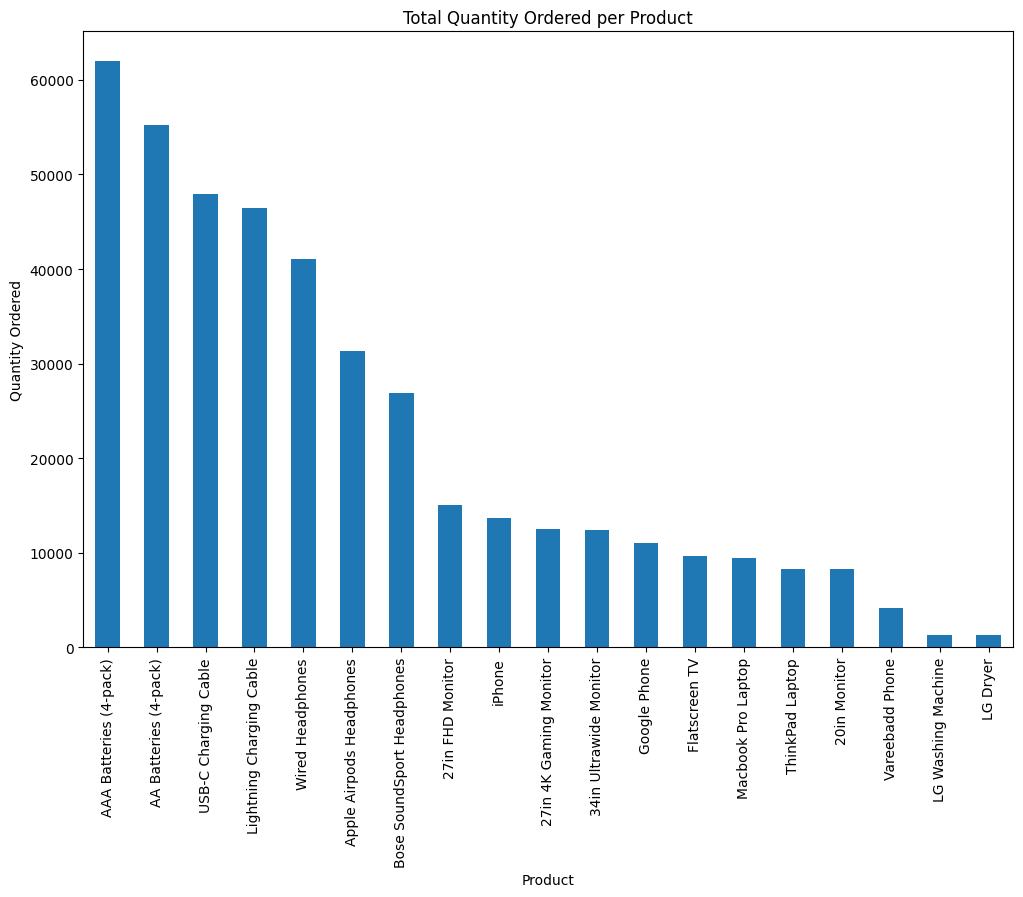

In [57]:

plt.figure(figsize=(12, 8))
product_quantity_ordered.plot(kind='bar')
plt.title('Total Quantity Ordered per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical')
plt.show()

## Product Sales Analysis

The bar chart represents the total quantity of each product ordered. The x-axis lists the products, and the y-axis represents the quantity ordered.

### Key Observations:
- **High Volume Low-Cost Items**: The most ordered products appear to be lower-cost items, such as 'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', and charging cables. These products are typically consumables or accessories with frequent repurchase rates, which could explain their high sales volume.
- **Moderate Sales for Mid-Range Items**: Mid-range products like 'Wired Headphones', 'Apple Airpods Headphones', and 'Bose SoundSport Headphones' show moderate sales volumes. Their necessity for the modern consumer and the rise of portable electronics might contribute to these numbers.
- **Lower Volume High-Cost Items**: Expensive products, such as 'Macbook Pro Laptop', 'ThinkPad Laptop', and 'LG Washing Machine', understandably have lower sales volumes due to their higher price points and less frequent purchase rates.
- **Implications for Inventory**: The company should ensure adequate stock levels for the high-volume products to meet customer demand, especially during peak sales periods.
- **Marketing Focus**: While low-cost items sell in higher volumes, marketing strategies should also focus on increasing the sale of high-margin products to maximize revenue.

### Recommendations:
- **Bundling**: Offering bundles that combine high-volume, low-cost items with high-margin products could increase the overall basket size and revenue.
- **Promotions**: Running promotions on mid-range products might entice customers looking for value without a high price tag, potentially increasing their sales volumes.
- **Loyalty Programs**: Introducing loyalty programs could encourage repeat purchases of consumable items, sustaining the high volume of sales.

By understanding the sales volumes across different product categories, the company can tailor its marketing, inventory, and sales strategies to align with consumer purchasing behavior.


C:\Users\mavur\AppData\Local\Temp\ipykernel_15244\1458127146.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_group_sorted.index, rotation='vertical', size=8)


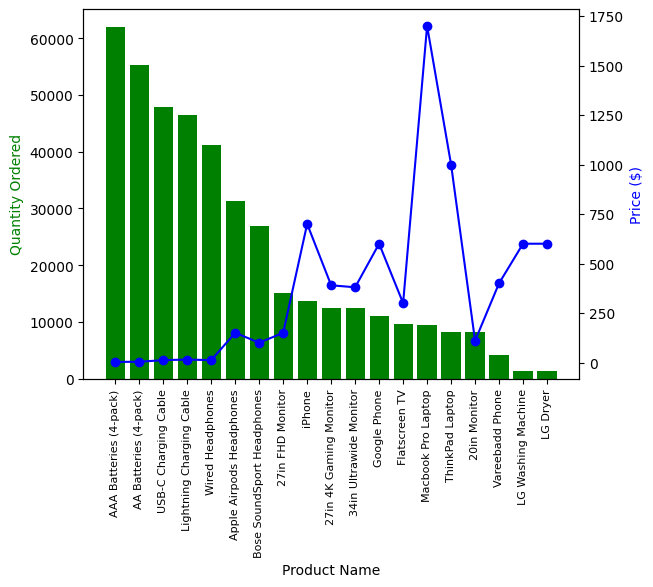

In [58]:


# Group by 'Product' and calculate the sum of 'Quantity Ordered' and the mean of 'Price Each'
product_group = all_data.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

# Sort the products by the quantity ordered to have a meaningful plot
product_group_sorted = product_group.sort_values('Quantity Ordered', ascending=False)

# Create a figure and a bar plot on the primary y-axis
fig, ax1 = plt.subplots()

ax1.bar(product_group_sorted.index, product_group_sorted['Quantity Ordered'], color='g')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')

# Create a secondary y-axis for the average price
ax2 = ax1.twinx()
ax2.plot(product_group_sorted.index, product_group_sorted['Price Each'], color='b', marker='o', linestyle='-')
ax2.set_ylabel('Price ($)', color='b')

# Set the product names as the x-tick labels with a vertical rotation for better readability
ax1.set_xticklabels(product_group_sorted.index, rotation='vertical', size=8)

# Show the plot
plt.show()


## Analysis of Product Sales Quantity and Average Price

The dual-axis chart presents a comparison between the quantity of each product ordered and their average prices.

### Visualization Overview:
- **Green Bars (Left Y-Axis)**: Represent the total quantity ordered for each product. This gives us an idea of the popularity or demand for each item.
- **Blue Line (Right Y-Axis)**: Depicts the average price point for each product, providing insight into their market positioning in terms of cost.

### Insights Drawn:
- **Most Ordered Products**: Products like 'AAA Batteries (4-pack)' and 'AA Batteries (4-pack)' are the most ordered. These are typically low-cost items with high turnover rates, suggesting they are purchased frequently and in larger quantities.
- **Pricing Correlation**: There seems to be an inverse relationship between quantity ordered and price, which is common as consumers tend to buy more of less expensive items.
- **High Price, Lower Volume**: More expensive products, such as 'MacBook Pro Laptop' and 'LG Dryer', have a lower sales quantity, which may reflect a combination of higher price points and lower purchase frequency.

### Strategic Takeaways:
- **Inventory Management**: It is crucial to maintain sufficient stock for high-demand, low-cost products to prevent stockouts and lost sales.
- **Marketing Strategy**: Highlighting the value proposition of higher-priced items through marketing could help increase their sales volumes.
- **Bundling Opportunities**: Creating bundles that combine high-volume products with higher-priced items might encourage sales of more expensive products.

### Recommendations:
- **Cross-Selling Initiatives**: Use the popularity of high-volume items to cross-sell related products or accessories that are higher in price.
- **Adjust Pricing Strategy**: Analyze the price elasticity of demand for each product to determine if a price adjustment could lead to an increase in overall revenue.
- **Promotions and Discounts**: Consider offering periodic discounts on higher-priced items to stimulate purchase interest and increase sales volumes.

Overall, the analysis suggests that while lower-priced items drive volume, there is an opportunity to boost the sales of higher-priced products through strategic marketing and pricing tactics.
